## Loading Libraries

In [ ]:
pip install matplotlib

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,CustomerID,Total Day Charge,Total Eve Charge,Churn
0,1001,52.31,24.12,No
1,1002,67.45,31.55,Yes
2,1003,43.22,19.44,No
3,1004,75.88,36.90,Yes
4,1005,58.11,28.33,No


## Pre-Processing Data

In [4]:
df_dummy = pd.get_dummies(data = df, columns = ["Churn"],dtype=int,drop_first = True) 
# Gives Yes or No in same col (one col name may be Churn_Yes or Churn_No (and assigns 0 or 1)

In [5]:
df_dummy.head()

,CustomerID,Total Day Charge,Total Eve Charge,Churn_Yes
0,1001,52.31,24.12,0
1,1002,67.45,31.55,1
2,1003,43.22,19.44,0
3,1004,75.88,36.90,1
4,1005,58.11,28.33,0


In [6]:
X = df_dummy[["Total Day Charge","Total Eve Charge"]].values # values : convert to numpy arrays
y = df_dummy["Churn_Yes"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,train_size= 0.8, random_state=1,stratify = y)

## Model Training and Testing

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

In [9]:
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [10]:
knn.predict(X_test) #retunrs numpy arrays

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [11]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [12]:
knn.score(X_test,y_test)

1.0

In [20]:
# Model Complexity Curve
n = np.arange(1,10)
train_accuracies = {}
test_accuracies = {}

for neighbor in n:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train,y_train) # Creating a dict where key is number of neighbours
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(n, '\n', train_accuracies, '\n', test_accuracies)

[1 2 3 4 5 6 7 8 9] 
 {np.int64(1): 1.0, np.int64(2): 0.975, np.int64(3): 1.0, np.int64(4): 0.975, np.int64(5): 1.0, np.int64(6): 1.0, np.int64(7): 1.0, np.int64(8): 0.975, np.int64(9): 0.975} 
 {np.int64(1): 1.0, np.int64(2): 1.0, np.int64(3): 1.0, np.int64(4): 1.0, np.int64(5): 1.0, np.int64(6): 1.0, np.int64(7): 1.0, np.int64(8): 1.0, np.int64(9): 1.0}


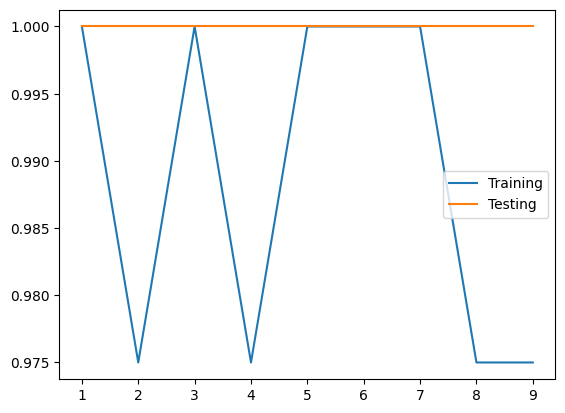

In [30]:
plt.plot(n,train_accuracies.values(),label = "Training")
plt.plot(n,test_accuracies.values(),label = "Testing")
plt.legend()
plt.show()
# train_accuracies.values()